In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
img = cv.imread("sudoku_real_2.jpeg",0)

In [5]:
import matplotlib.pyplot as plt

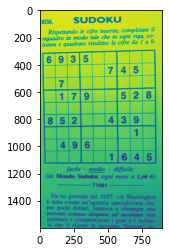

In [6]:
plt.imshow(img)

In [7]:
# Defino las funciones necesarias



    
def contourns(image):
    area = 0
    contours, hierarchy = cv.findContours(image,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
    for con in contours:
        area = cv.contourArea(con)
    return area





def limpieza(digits,mask):
    digits_clean = []
    
    for i in range(len(digits)):
        aux = digits[i]
        aux = cv.bitwise_and(aux,mask)
        
        if contourns(aux) < 30:
            aux = np.zeros_like(aux)
        
        digits_clean.append(aux)
    return digits_clean


def getDigits(img):
    im = []
    iniY = 0
    iniX = 0
    
    for j in range(28,280,28):
        for i in range(28,280,28):
            im.append(img[iniY:j, iniX:i])
            if i < 253:
                iniX = i
        iniX = 0
        if j < 253:
            iniY = j
        else:
            iniY = 0
    return im

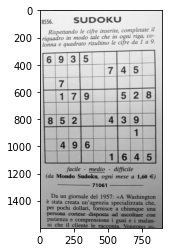

In [8]:
# Cargo y ploteo imagen en escala de grises
# Partiendo de esa imagen se desea clasificar cada numero de lo grilla asi despues resolverlo.

img = cv.imread("sudoku_real_2.jpeg",0)
plt.imshow(img, cmap = 'gray')

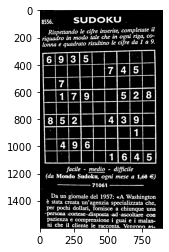

In [9]:
# Binarizacion de la imagen

img_binaria = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,57,5)
plt.imshow(img_binaria, cmap = 'gray')

In [14]:
# Marco las esquinas manualmente, es una deficiencia del programa.
# Posiciono en la imagen las esquinas de la grilla del sudoku. 
srcCalib = np.array([[20, 318],
                    [837, 295],
                    [38, 1121],
                    [846, 1121]], dtype=float)

dstCalib = np.meshgrid(np.arange(2) * 252.0 , np.arange(2) * 252.0)
dstCalib = np.reshape(dstCalib, (2,-1)).T

# Un cuadrado como destino, de 252 ya que las imagenes del data set son de 28x28
# Por lo tanto 28x9 = 252

In [11]:
import numpy as np

[[ 3.15805310e-01 -7.07907294e-03 -4.06496100e+00]
 [ 8.69407387e-03  3.08828624e-01 -9.83813839e+01]
 [ 3.45002931e-05 -1.48127961e-05  1.00000000e+00]]


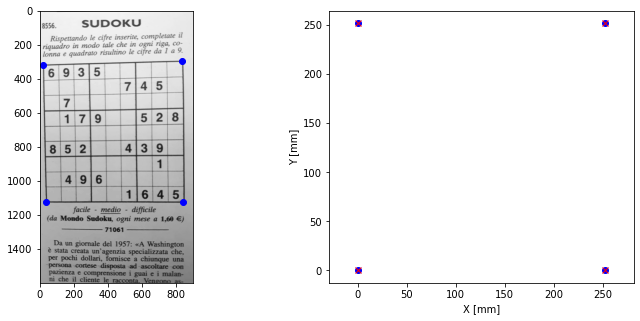

In [19]:
# Ploteo sobre la imagen los puntos seleccionados 

fig = plt.figure("comparaperspectivetransform", figsize=(12, 5))
fig.clf()
ax1 = plt.subplot(121)
ax1.imshow(img, cmap = "gray")
ax1.plot(*srcCalib.T, 'ob')

# Para la homografia preparo el ploteo
# Se busca ver el acierto de los puntos elegidos con los puntos de destino

ax2 = plt.subplot(122)
ax2.plot(*dstCalib.T, 'ob')
ax2.axis('equal')
ax2.set_xlabel("X [mm]")
ax2.set_ylabel("Y [mm]")

## Calculo la homografia. Matriz de roto traslacion de la imagen con 8 grados de libertad

H, mask = cv.findHomography(srcCalib, dstCalib)

print(H)
srcCalib = srcCalib.reshape((-1, 1, 2))
dstProj = cv.perspectiveTransform(srcCalib, H)
dstProj = dstProj.reshape((-1, 2))

ax2.plot(*dstProj.T, 'xr')


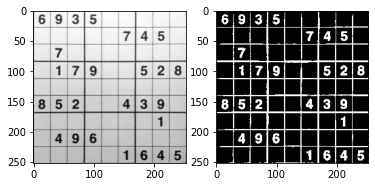

In [22]:

dsize = (252, 252)
warped = cv.warpPerspective(img, H, dsize)


img_ = cv.adaptiveThreshold(warped,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,57,5)

plt.figure()
plt.subplot(121)
plt.imshow(warped, cmap = "gray")
plt.subplot(122)
plt.imshow(img_, cmap = "gray")


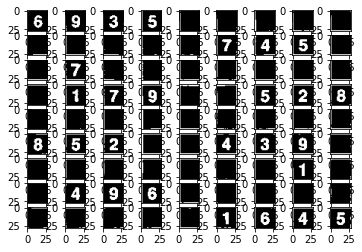

In [25]:
# Con esta funcion buscamos dividir en 81 cuadrados de 28x28 pixeles

def getDigits(img):
    im = []
    iniY = 0
    iniX = 0
    
    for j in range(28,280,28):
        for i in range(28,280,28):
            im.append(img[iniY:j, iniX:i])
            if i < 253:
                iniX = i
        iniX = 0
        if j < 253:
            iniY = j
        else:
            iniY = 0
    return im

digits = getDigits(img_)

plt.figure()
for i in range(0,81):
    plt.subplot(9,9,i+1)
    plt.imshow(digits[i], cmap = "gray")

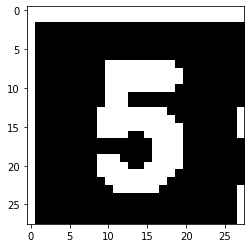

In [28]:
# Al plotear observamos que tiene un recuadro y eso es ruido a la hora de testear la red 
plt.imshow(digits[80], cmap = 'gray')

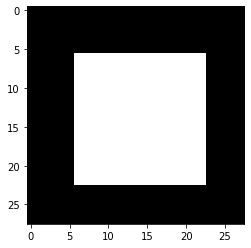

In [29]:

mask = np.zeros((28,28), dtype='uint8')
mask1 = np.zeros((28,28), dtype='uint8')
mask2 = np.zeros((28,28), dtype='uint8')
mask3 = np.zeros((28,28), dtype='uint8')

mask4 = cv.rectangle(mask, (0,0),(28,5), 255, -1 )
mask5 = cv.rectangle(mask1, (0,0),(5,28), 255, -1 )
mask6 = cv.rectangle(mask2, (0,23),(28,28), 255, -1 )
mask7 = cv.rectangle(mask3, (23,0),(28,28), 255, -1 )

mask8 = cv.bitwise_or(mask4,mask5)
mask8 = cv.bitwise_or(mask8,mask6)
mask8 = cv.bitwise_or(mask8,mask7)
mask8 = cv.bitwise_not(mask8)

plt.imshow(mask8, cmap = 'gray')

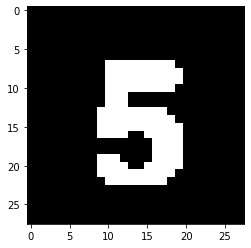

In [30]:
def limpieza(digits,mask):
    digits_clean = []
    
    for i in range(len(digits)):
        aux = digits[i]
        aux = cv.bitwise_and(aux,mask)
        
        if contourns(aux) < 30:
            aux = np.zeros_like(aux)
        
        digits_clean.append(aux)
    return digits_clean

def contourns(image):
    area = 0
    contours, hierarchy = cv.findContours(image,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_NONE)
    for con in contours:
        area = cv.contourArea(con)
    return area

digits = limpieza(digits,mask8)

plt.imshow(digits[80], cmap = 'gray')

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Lambda, MaxPooling2D, Flatten, Dense
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
(trainx,trainy),(testx,testy)=mnist.load_data()
#plt.imshow(testx[77], cmap='gray')
#plt.show()

trainx = trainx.reshape(60000, 28, 28, 1)
testx = testx.reshape(10000, 28, 28, 1)
trainx=trainx/255
testx = testx / 255 #normalizo 0 a 1
trainy=to_categorical(trainy) 
testy = to_categorical(testy)
num_classes=testy.shape[1]

model = Sequential()
model.add(Convolution2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Convolution2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainx,trainy, validation_data=(testx, testy), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1173 - accuracy: 0.9652 - val_loss: 0.0546 - val_accuracy: 0.9825
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0432 - accuracy: 0.9865 - val_loss: 0.0657 - val_accuracy: 0.9781
Epoch 3/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0272 - accuracy: 0.9912 - val_loss: 0.0448 - val_accuracy: 0.9853
Epoch 4/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0429 - val_accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0111 - accuracy: 0.9959 - val_loss: 0.0508 - val_accuracy: 0.9868


In [32]:

def get_predictions(digits,model):
    
    predictions = []
    length = len(digits)
    for i in range(length):
        if cv.countNonZero(digits[i]) == 0:
            predictions.append(0)
        else:
                    
                    pred = model.predict(digits[i].reshape(1,28,28,1))
                    predictions.append(pred.argmax())
                                 
    return predictions

def get_board(predictions):
    board = np.array(predictions)
    board = board.reshape(9,9)
    
    return board


In [40]:

predictions = get_predictions(digits,model)
board = get_board(predictions)   
print(board)

[[8 9 3 5 0 0 0 0 0]
 [0 0 0 0 0 7 4 5 0]
 [0 7 0 0 0 0 0 0 0]
 [0 1 7 0 0 0 5 2 8]
 [0 0 0 0 0 0 0 0 0]
 [8 5 2 0 0 4 3 9 0]
 [0 0 0 0 0 0 0 1 0]
 [0 4 9 8 0 0 0 0 0]
 [0 0 0 0 0 1 8 4 5]]


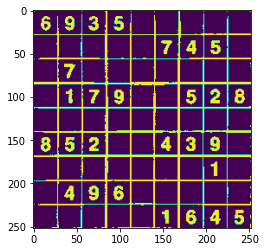

In [39]:
plt.imshow(img_)

In [54]:
# Comparando podemos observar que la red puede equivocarse, es una red convolutional muy simple
# Puede confundir el 4 con el 9 el 7 con el 1 y el 6 con el 8
board[0,0]=6
board[8,6]=6
board[3,3]=9
board[7,3]=6


In [55]:
print(board)

[[6 9 3 5 0 0 0 0 0]
 [0 0 0 0 0 7 4 5 0]
 [0 7 0 0 0 0 0 0 0]
 [0 1 7 9 0 0 5 2 8]
 [0 0 0 0 0 0 0 0 0]
 [8 5 2 0 0 4 3 9 0]
 [0 0 0 0 0 0 0 1 0]
 [0 4 9 6 0 0 0 0 0]
 [0 0 0 0 0 1 6 4 5]]


In [56]:
def solve(board):
	"""
	Solves a sudoku board using backtracking
	:param board: 2D list of ints
	:return: solution - list of ints with no 0 elements
	"""
	find = findEmpty(board)
	if (find):
		row, col = find
	else:
		return True; #return True equals no empty boxes found, puzzle is solved

	for i in range(1, 10):
		if isValid(board, (row, col), i):
			board[row][col] = i

			if solve(board):
				return True

			board[row][col] = 0

	return False

def isValid(board, position, num):
	"""
	Returns- if the attempt move is valid
	:param-board: 2D list of ints
	:param-position: (row, col) on board
	:param-num:-bool
	"""

	#check row
	for i in range(0, len(board)):
		if board[position[0]][i] == num and position[1] != i:
			return False

	#check col
	for i in range(0, len(board)):
		if board[i][position[1]] == num and position[0] != i:
			return False

	#Check box
	box_x = position[1] // 3
	box_y = position[0] // 3

	for i in range(box_y * 3, box_y * 3 + 3):
		for j in range(box_x * 3, box_x * 3 + 3):
			if board[i][j] == num and (i, j) != position:
				return False

	return True

def findEmpty(board):
	"""
	finds and empty space in the board
	:param-board: partially complete board
	:return: (int, int) row, col
	"""

	for i in range(len(board)):
		for j in range(len(board[0])):
			if board[i][j] == 0:
				return (i, j) #return row and col of empty position
	return None #no empty boxes found

def printBoard(board):
	"""
	prints the board 
	:param board: 2D list of ints
	:return: None
	"""

	for i in range(len(board)):
		if i % 3 == 0 and i != 0:
			print("- - - - - - - - - - - - -")
		for j in range(len(board[0])):
			if j % 3 == 0 and j != 0:
				print(" | ", end="")
				
			if j == 8:
				print(board[i][j], end="\n")
			else:
				print(str(board[i][j]) + " ", end="")

In [57]:
solve(board)


True

In [58]:
printBoard(board)

6 9 3  | 5 4 2  | 7 8 1
2 8 1  | 3 6 7  | 4 5 9
5 7 4  | 8 1 9  | 2 6 3
- - - - - - - - - - - - -
4 1 7  | 9 3 6  | 5 2 8
9 3 6  | 2 5 8  | 1 7 4
8 5 2  | 1 7 4  | 3 9 6
- - - - - - - - - - - - -
7 6 5  | 4 8 3  | 9 1 2
1 4 9  | 6 2 5  | 8 3 7
3 2 8  | 7 9 1  | 6 4 5
